In [1]:
import os
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from core import aggregate_daily_data

# Monthly Aggregated Data from Farzad

In [2]:
df = pd.read_csv(os.path.join('.', 'Aggregated Data.csv'))
df.head()

,Time_Code,Year,Month,LSCA,OA,SCA,TRA,Total
0,1,2017,10,0,1,1,0,2
1,2,2017,11,0,1,0,0,1
2,3,2017,12,0,1,1,0,2
3,4,2018,1,0,3,1,0,4
4,5,2018,2,0,0,1,0,1


In [3]:
df['Day'] = 1 #datetime doesn't support null days
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']]).dt.date
df['date_year_month'] = pd.to_datetime(df[['Year', 'Month', 'Day']]).dt.strftime('%Y-%m')
df['Total_Assessment_Given'] = df['Total']

In [4]:
df.head()

,Time_Code,Year,Month,LSCA,OA,SCA,TRA,Total,Day,Date,date_year_month,Total_Assessment_Given
0,1,2017,10,0,1,1,0,2,1,2017-10-01,2017-10,2
1,2,2017,11,0,1,0,0,1,1,2017-11-01,2017-11,1
2,3,2017,12,0,1,1,0,2,1,2017-12-01,2017-12,2
3,4,2018,1,0,3,1,0,4,1,2018-01-01,2018-01,4
4,5,2018,2,0,0,1,0,1,1,2018-02-01,2018-02,1


# Daily data with system and id removed
## Attempt to replicate monthly aggregated data

In [5]:
df_daily = pd.read_csv(os.path.join('.', 'Assessment Data_Daily.csv'))
print(f"shape daily data: {df_daily.shape}")
df_daily.head()

shape daily data: (578, 20)


,Assessment Type,Assessment Kick-Off Date,Assessment Schedule Notes,Assessment Schedule Status,Assessor(s),Assessment Documents,Assessment Estimated Completion Date,Assessment in the Next 90 Days?,Assessment Outbrief,Assessment Report Due,First Published,Last Updated,Pre-Scoping Discussion Meeting,Program Area,Remediation Plan Due,System Acronym,ATO/IATO Expiration Date (IACS),Portfolio,Program Office (IACS),Last Assessment
0,LSCA,NaN,Requesting assessment slot in September. Imple...,Add to schedule,NaN,NaN,NaN,NaN,NaN,NaN,7/29/20 6:25,8/12/20 16:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LSCA,NaN,20-0819(HML): System used for a few years by O...,Awaiting Readiness Date,NaN,NaN,NaN,NaN,NaN,NaN,8/19/20 10:52,8/19/20 10:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SCA,NaN,20-0819 (HML): New system being procured by RMD.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/19/20 10:55,1/19/21 15:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TRA,NaN,20-0819(HML): schedule Q3 or Q4,Add to schedule,NaN,NaN,NaN,NaN,NaN,NaN,8/19/20 16:11,8/19/20 16:11,NaN,NaN,NaN,NaN,4/21/22,OCIO,OCIO - Office of the Chief Information Officer,6/29/20
4,TRA,NaN,20-0819(HML): schedule Q3 or Q4 FY22,Add to schedule,NaN,NaN,NaN,NaN,NaN,NaN,8/19/20 16:11,8/19/20 16:11,NaN,NaN,NaN,NaN,4/21/22,OCIO,OCIO - Office of the Chief Information Officer,6/29/20


## Remove na assessment kick-off date & duplicates

In [6]:
df_daily = aggregate_daily_data.clean_rows_helper(df_daily)
print(f"shape daily data: {df_daily.shape}")

shape daily data: (326, 20)


## Create Year-Month (date) column

In [7]:
df_daily = aggregate_daily_data.create_date_columns_helper(df_daily)

In [8]:
df_daily.head()

,Assessment Type,Assessment Kick-Off Date,Assessment Schedule Notes,Assessment Schedule Status,Assessor(s),Assessment Documents,Assessment Estimated Completion Date,Assessment in the Next 90 Days?,Assessment Outbrief,Assessment Report Due,...,ATO/IATO Expiration Date (IACS),Portfolio,Program Office (IACS),Last Assessment,Kick-Off_DATE,kickoff_year_month,Year,Month,Day,Date
0,OA,10/3/17,NaN,Completed,NaN,NaN,NaN,No,NaN,NaN,...,2/27/18,ERO,ERO - Enforcement and Removal Operations,NaN,2017-10-03,2017-10,2017,10,1,2017-10-01
1,SCA,10/16/17,NaN,Completed,NaN,NaN,NaN,No,10/30/17,11/1/17,...,4/21/22,ERO,ERO - Enforcement and Removal Operations,2/8/18,2017-10-16,2017-10,2017,10,1,2017-10-01
2,OA,11/21/17,NaN,Completed,NaN,NaN,NaN,No,NaN,NaN,...,4/21/22,ERO,ERO - Enforcement and Removal Operations,2/19/19,2017-11-21,2017-11,2017,11,1,2017-11-01
3,SCA,12/4/17,NaN,Completed,NaN,NaN,NaN,No,12/18/17,12/20/17,...,4/21/22,HSI,HSI - Homeland Security Investigations,5/7/19,2017-12-04,2017-12,2017,12,1,2017-12-01
4,OA,12/19/17,NaN,Completed,NaN,NaN,NaN,No,NaN,NaN,...,4/21/22,HSI,HSI - Homeland Security Investigations,7/12/19,2017-12-19,2017-12,2017,12,1,2017-12-01


## One hot encode assessment type

In [9]:
df_daily = aggregate_daily_data.one_hot_encode_assessment_helper(df_daily)
df_daily.head()

,Assessment Type,Assessment Kick-Off Date,Assessment Schedule Notes,Assessment Schedule Status,Assessor(s),Assessment Documents,Assessment Estimated Completion Date,Assessment in the Next 90 Days?,Assessment Outbrief,Assessment Report Due,...,Year,Month,Day,Date,ATT,LSCA,OA,SCA,TRA,total_assessments_computed
0,OA,10/3/17,NaN,Completed,NaN,NaN,NaN,No,NaN,NaN,...,2017,10,1,2017-10-01,0,0,1,0,0,1
1,SCA,10/16/17,NaN,Completed,NaN,NaN,NaN,No,10/30/17,11/1/17,...,2017,10,1,2017-10-01,0,0,0,1,0,1
2,OA,11/21/17,NaN,Completed,NaN,NaN,NaN,No,NaN,NaN,...,2017,11,1,2017-11-01,0,0,1,0,0,1
3,SCA,12/4/17,NaN,Completed,NaN,NaN,NaN,No,12/18/17,12/20/17,...,2017,12,1,2017-12-01,0,0,0,1,0,1
4,OA,12/19/17,NaN,Completed,NaN,NaN,NaN,No,NaN,NaN,...,2017,12,1,2017-12-01,0,0,1,0,0,1


## Subset to completed, in progress, scheduled

In [10]:
df_daily = aggregate_daily_data.subset_data_by_schedule_status_helper(df_daily)

## group by month-date

In [11]:
monthly_data = aggregate_daily_data.create_monthly_aggregate_from_daily_data_helper(df_daily)
monthly_data.tail(n=10)

,ATT,LSCA,OA,SCA,TRA,total_assessments_computed
Date,,,,,,
2021-01-01,1,0,4,2,0,7
2021-02-01,0,1,7,1,0,9
2021-03-01,0,1,1,5,0,7
2021-04-01,0,3,3,3,0,9
2021-05-01,0,0,0,4,0,4
2021-06-01,0,0,0,5,0,5
2021-07-01,0,1,8,1,0,10
2021-10-01,0,0,0,1,0,1
2021-11-01,0,0,0,1,0,1


In [12]:
df.tail(n=10)

,Time_Code,Year,Month,LSCA,OA,SCA,TRA,Total,Day,Date,date_year_month,Total_Assessment_Given
36,37,2020,10,3,1,0,1,6,1,2020-10-01,2020-10,6
37,38,2020,11,0,5,1,0,7,1,2020-11-01,2020-11,7
38,39,2020,12,1,4,0,0,7,1,2020-12-01,2020-12,7
39,40,2021,1,0,4,2,0,7,1,2021-01-01,2021-01,7
40,41,2021,2,1,7,1,0,9,1,2021-02-01,2021-02,9
41,42,2021,3,1,1,5,0,7,1,2021-03-01,2021-03,7
42,43,2021,4,3,3,3,0,9,1,2021-04-01,2021-04,9
43,44,2021,5,0,0,4,0,4,1,2021-05-01,2021-05,4
44,45,2021,6,0,0,5,0,7,1,2021-06-01,2021-06,7
45,46,2021,7,1,8,1,0,10,1,2021-07-01,2021-07,10


# Compare provided monthly vs computed monthly data

In [13]:
print(f"num obs in computed monthly data: {len(monthly_data)}")
print(f"num obs in provided monthly data: {len(df)}")

num obs in computed monthly data: 49
num obs in provided monthly data: 46


In [14]:
df.set_index('Date', inplace=True)

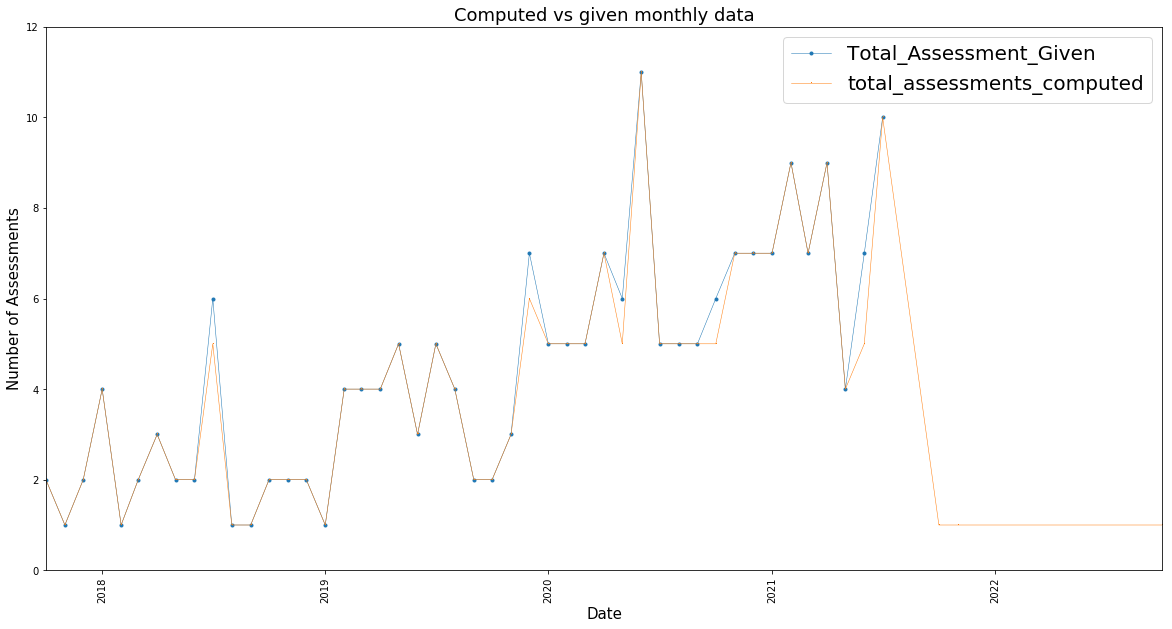

In [15]:
plt.figure(figsize=(20,10))
ax = df['Total_Assessment_Given'].plot(marker = ".", linewidth=0.5)
ax2 = monthly_data['total_assessments_computed'].plot(marker = ',', linewidth=0.5)
plt.ylabel('Number of Assessments', size=15)
plt.xlabel("Date", size=15)
plt.title('Computed vs given monthly data', size=18)
plt.xticks(rotation=90)
ax.set_ylim([0, 12])
ax.set_xlim([min(monthly_data.index), max(monthly_data.index)])
plt.legend(fontsize=20)

## Probably good enough

In [16]:
# def plot_seven_period_moving_avg(df, date_col, col_to_avg, 
#                                  title, y_axis_label, avg = False):

#     compound_date = df.groupby([date_col])[col_to_avg].sum().reset_index()
#     compound_date.set_index(date_col, inplace=True)
    
#     plt.figure(figsize=(20,6))
    
#     if avg:
#         MOVING_AVG_WINDOW = 4
#         compound_date['4_period_avg'] = (compound_date[col_to_avg].
#                                       rolling(window=MOVING_AVG_WINDOW).mean())
#         ax = compound_date['4_period_avg'].plot(marker = ",", linewidth=0.5, color = "red")
#     else:
#         ax = compound_date[col_to_avg].plot(marker = ".", linewidth=0.5)
#     plt.ylabel(y_axis_label, size=15)
#     plt.xlabel("Date", size=15)
#     plt.title(title, size=18)
#     plt.xticks(rotation=90)
#     ax.set_ylim([0, 12])
#     ax.set_xlim([min(df.Date), max(df.Date)])
#     # Major ticks every month.
#     fmt_month = mdates.MonthLocator()
#     ax.xaxis.set_major_locator(fmt_month)

In [17]:
# plot_seven_period_moving_avg(df, 'Date', 'Total_Assessment',
#                             'Total Assessments by Month', 'Num Assessments')

In [18]:
# plot_seven_period_moving_avg(df, 'Date', 'Total_Assessment',
#                             'Total Assessment by Month (moving avg)', 'Num Assessments', True)

In [19]:
# plot_seven_period_moving_avg(df, 'Date', 'LSCA',
#                             'Total Assessments by Month', 'Num Assessments')

In [20]:
# plot_seven_period_moving_avg(df, 'Date', 'OA',
#                             'Total Assessments by Month', 'Num Assessments')

In [21]:
# plot_seven_period_moving_avg(df, 'Date', 'SCA',
#                             'Total Assessments by Month', 'Num Assessments')

In [22]:
# plot_seven_period_moving_avg(df, 'Date', 'TRA',
#                             'Total Assessments by Month', 'Num Assessments')